## EDA 결과로 나온 가설 4개에 대한 단순회귀와 다중회귀 

### 파일 로딩 & 기본 셋팅

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
from scipy import stats
import os
import platform



if platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


df =pd.read_csv("../../data/2.processed/processed_for_analysis.csv")

df.head()
df.columns

Index(['시점', '행정구역(시)', '행정구역(시군구)별', '총인구수', '남자인구수', '여자인구수', '영아기', '아동기',
       '청소년기', '청년기', '중년기', '노년기', 'CCTV', '1인가구비율', '경찰서수', '강력범죄_살인계',
       '강력범죄_강도', '강력범죄_성범죄', '절도범죄_전체', '폭력범죄_전체', '지능범죄_재산범죄', '풍속범죄_전체',
       '특별경제범죄_전체', '마약범죄_전체', '보건범죄_전체', '환경범죄_전체', '교통범죄_전체', '노동범죄_전체',
       '안보범죄_전체', '선거범죄_전체', '병역범죄_전체', '기타범죄_전체', '노년기_비율', '여성_비율', '청년기_비율',
       '남성_비율', '총범죄율'],
      dtype='object')

### 단순회귀 공통함수 정의 

In [13]:
def fit_ols(df, x_col, y_col):
    """
    OLS 모델을 적합하고, 진단에 필요한 데이터(잔차, 예측값)를 반환합니다.
    """
    # 데이터 전처리 (결측치 제거)
    data = df[[x_col, y_col]].dropna()
    X = data[[x_col]]
    y = data[y_col]
    
    # 상수항 추가
    X_const = sm.add_constant(X)
    
    # 모델 적합
    model = sm.OLS(y, X_const).fit()
    
    # 예측값 및 잔차 계산
    fitted = model.predict(X_const)
    residual = data[y_col] - fitted
    
    print(f" '{x_col}' -> '{y_col}' 모델 적합 완료")
    
    # 결과 딕셔너리 반환
    return {
        'model': model,
        'data': data,
        'X': X_const,
        'y': y,
        'fitted': fitted,
        'residual': residual,
        'x_col': x_col,
        'y_col': y_col
    }

### 선형성 체크 함수

In [14]:
def plot_linearity(result_dict):
    """
    (1) 선형성 확인: 산점도 + 회귀선
    """
    data = result_dict['data']
    x_col = result_dict['x_col']
    y_col = result_dict['y_col']
    
    plt.figure(figsize=(6, 5))
    sns.regplot(x=x_col, y=y_col, data=data, line_kws={'color': 'red'})
    plt.title(f'① 선형성 (Linearity): {x_col} vs {y_col}')
    plt.grid(True, alpha=0.3)
    plt.show()

### 정규성 체크 함수 

In [15]:
def plot_normality_hist(result_dict):
    """
    (2) 정규성 확인 1: 잔차 히스토그램
    """
    residual = result_dict['residual']
    
    plt.figure(figsize=(6, 5))
    sns.histplot(residual, kde=True)
    plt.title('② 정규성 (Normality) - Histogram')
    plt.xlabel('Residuals')
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_normality_qq(result_dict):
    """
    (3) 정규성 확인 2: Q-Q Plot
    """
    residual = result_dict['residual']
    
    plt.figure(figsize=(6, 5))
    stats.probplot(residual, dist="norm", plot=plt)
    plt.title('② 정규성 (Normality) - Q-Q Plot')
    plt.grid(True, alpha=0.3)
    plt.show()

### 등분산성 체크 함수

In [16]:
def plot_homoscedasticity(result_dict):
    """
    (4) 등분산성 확인: 잔차도 (Residuals vs Fitted)
    """
    fitted = result_dict['fitted']
    residual = result_dict['residual']
    
    plt.figure(figsize=(6, 5))
    # lowess=True는 잔차의 추세선을 그려 패턴 파악을 돕습니다.
    sns.residplot(x=fitted, y=residual, lowess=True, 
                  line_kws={'color': 'red', 'lw': 1}, scatter_kws={'alpha': 0.5})
    plt.title('③ 등분산성 (Homoscedasticity)')
    plt.xlabel('Fitted values (예측값)')
    plt.ylabel('Residuals (잔차)')
    plt.axhline(0, color='grey', linestyle='--')
    plt.grid(True, alpha=0.3)
    plt.show()

### 결과표 출력 함수 

In [23]:
def show_summary(result_dict):
    """
    OLS 회귀분석 결과표 출력
    """
    print(result_dict['model'].summary())

### 모델 적합 및 데이터 준비 후 검증 시작


 [분석 시작] 독립변수: 청년기_비율 --> 종속변수: 절도범죄_전체

 '청년기_비율' -> '절도범죄_전체' 모델 적합 완료


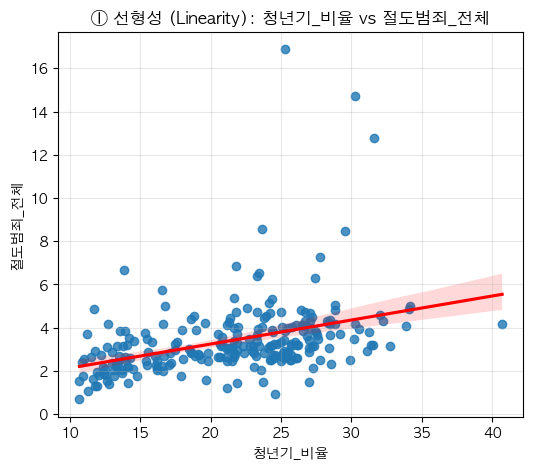

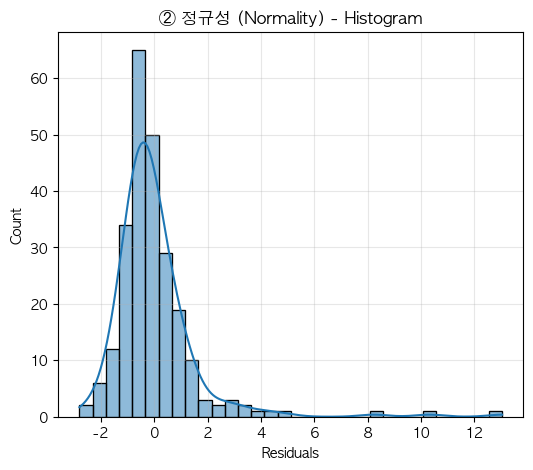

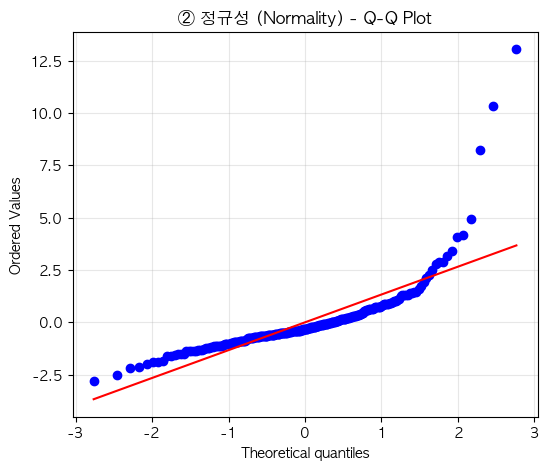

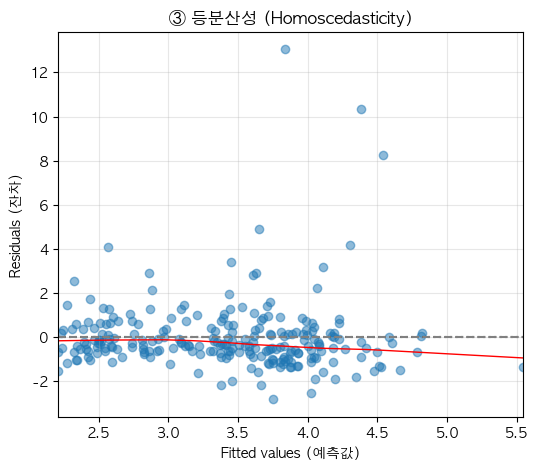


---  청년기_비율 -> 절도범죄_전체 회귀분석 결과표 ---
                            OLS Regression Results                            
Dep. Variable:                절도범죄_전체   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     41.08
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           7.61e-10
Time:                        16:55:46   Log-Likelihood:                -461.73
No. Observations:                 243   AIC:                             927.5
Df Residuals:                     241   BIC:                             934.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

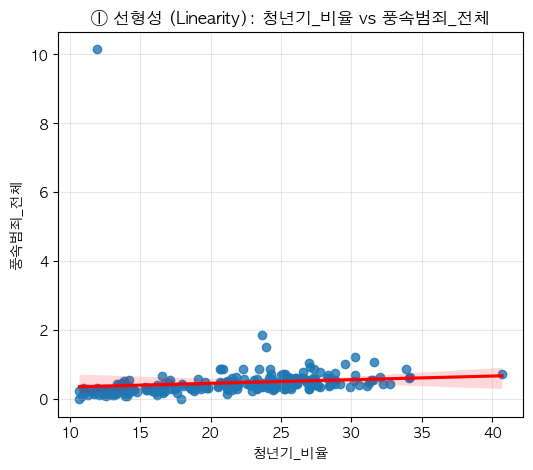

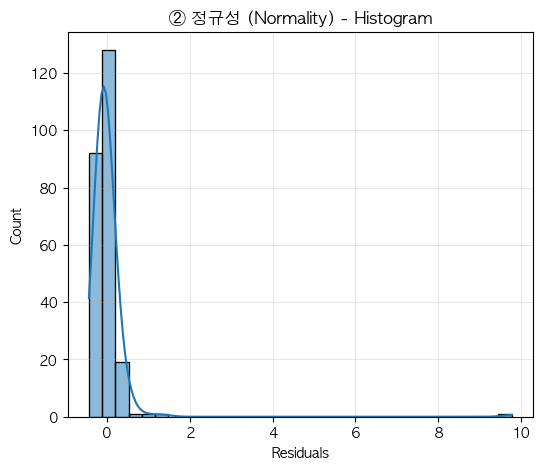

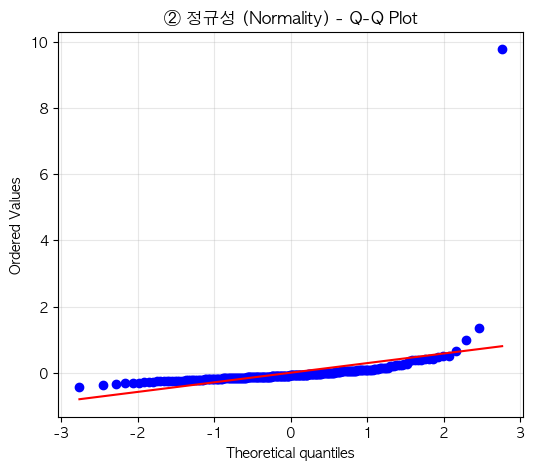

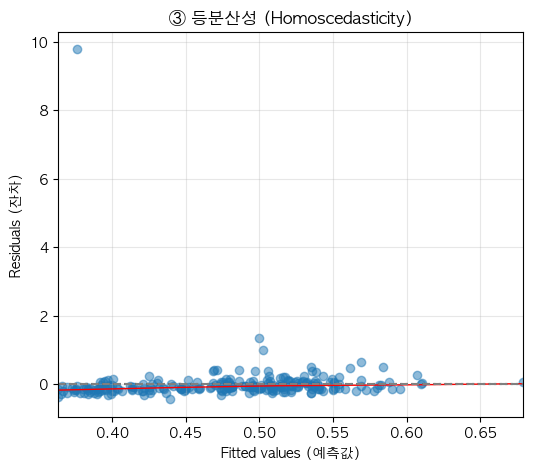


---  청년기_비율 -> 풍속범죄_전체 회귀분석 결과표 ---
                            OLS Regression Results                            
Dep. Variable:                풍속범죄_전체   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.216
Date:                Sun, 30 Nov 2025   Prob (F-statistic):              0.138
Time:                        16:55:46   Log-Likelihood:                -243.68
No. Observations:                 243   AIC:                             491.4
Df Residuals:                     241   BIC:                             498.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

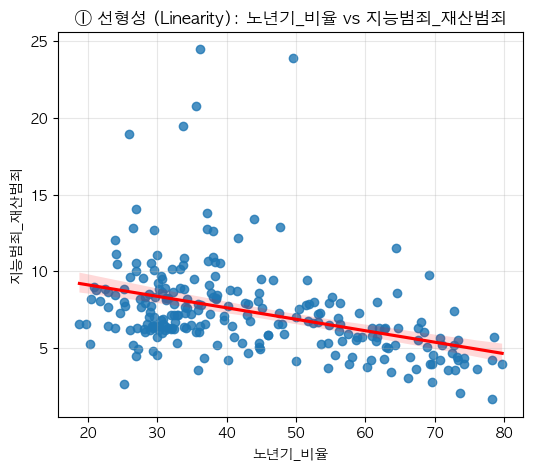

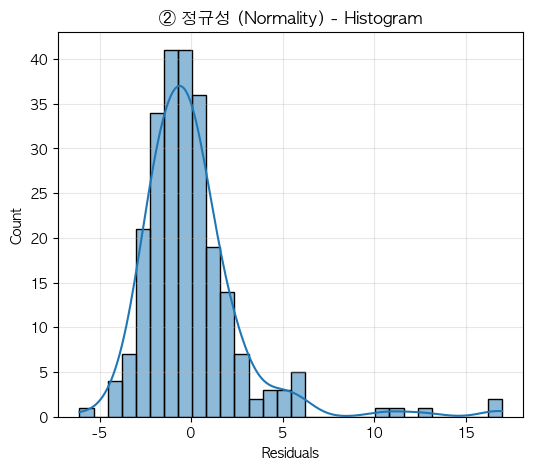

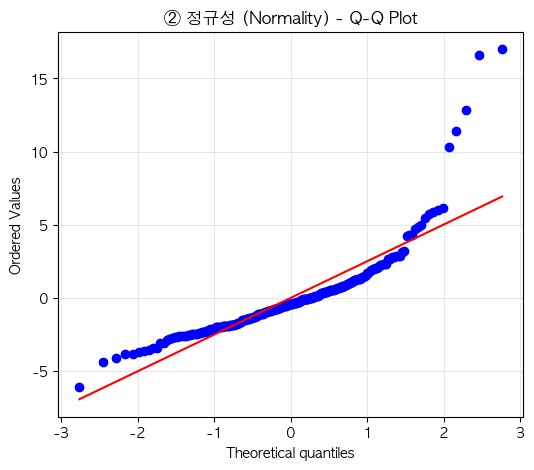

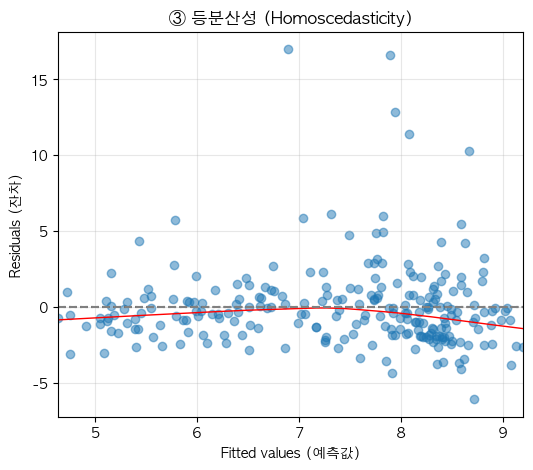


---  노년기_비율 -> 지능범죄_재산범죄 회귀분석 결과표 ---
                            OLS Regression Results                            
Dep. Variable:              지능범죄_재산범죄   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     42.95
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           3.38e-10
Time:                        16:55:47   Log-Likelihood:                -596.27
No. Observations:                 243   AIC:                             1197.
Df Residuals:                     241   BIC:                             1204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

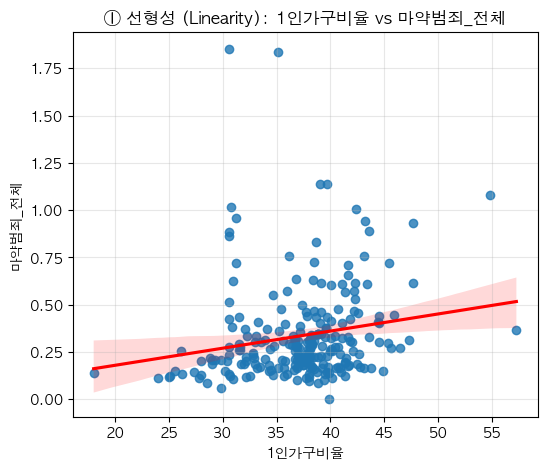

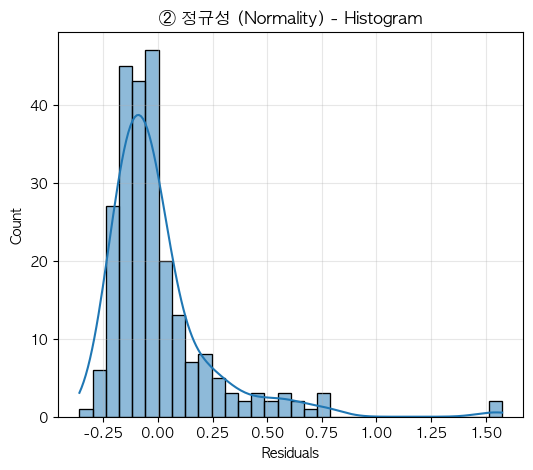

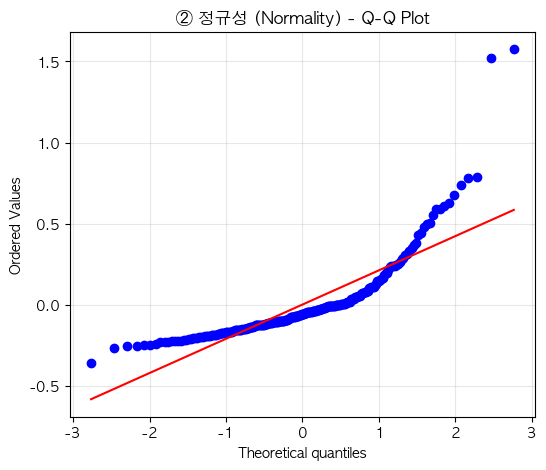

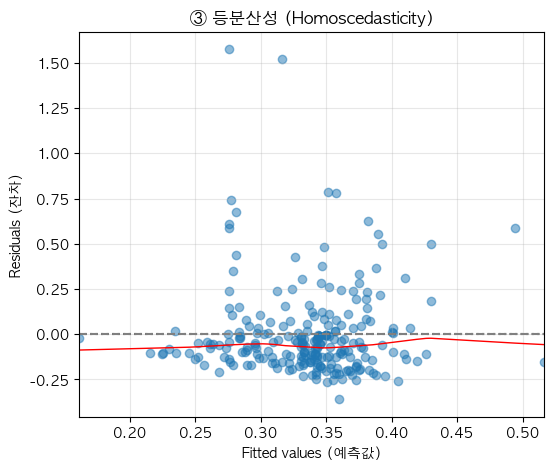


---  1인가구비율 -> 마약범죄_전체 회귀분석 결과표 ---
                            OLS Regression Results                            
Dep. Variable:                마약범죄_전체   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.403
Date:                Sun, 30 Nov 2025   Prob (F-statistic):            0.00409
Time:                        16:55:47   Log-Likelihood:                -3.3724
No. Observations:                 243   AIC:                             10.74
Df Residuals:                     241   BIC:                             17.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -

In [26]:
# 분석할 변수 쌍(Pair) 정의: (독립변수 X, 종속변수 Y)
analysis_targets = [
    ('청년기_비율', '절도범죄_전체'),       # 1. 청년층 -> 절도
    ('청년기_비율', '풍속범죄_전체'),       # 2. 청년층 -> 풍속
    ('노년기_비율', '지능범죄_재산범죄'),   # 3. 노년층 -> 지능범죄 
    ('1인가구비율', '마약범죄_전체')        # 4. 1인가구 -> 마약 
]

# 반복문을 통해 순차적으로 분석 실행
for x_col, y_col in analysis_targets:
    print(f"\n{'='*60}")
    print(f" [분석 시작] 독립변수: {x_col} --> 종속변수: {y_col}")
    print(f"{'='*60}\n")

    # 1단계: OLS 모델 적합
    
    results = fit_ols(df, x_col=x_col, y_col=y_col)

    # 2단계: 선형성 검증
    plot_linearity(results)

    # 3단계: 정규성 검증 (히스토그램 & Q-Q Plot)
    plot_normality_hist(results)
    plot_normality_qq(results)

    # 4단계: 등분산성 검증
    plot_homoscedasticity(results)

    # 5단계: 최종 통계 요약표 출력
    print(f"\n---  {x_col} -> {y_col} 회귀분석 결과표 ---")
    show_summary(results)
    
    print("\n" + "-"*60 + "\n") # 구분선

### 단순회귀 분석 결과 

#### 모델1 (청년기 비율 -> 절도 범죄): p< 0.01 이므로 통계적으로 유의하지만 정규성 가정이 일부 위배되어 있음 하지만 샘플 크기가 크기 때문에 경미한 이상치로 판단 후 진행 
#### 모델2 (청년기 비율 -> 풍속 범죄): 통계적으로 유의하지 않음 
#### 모델3 (노년기 비율 -> 지능 범죄): p-value가 매우 낮기 떄문에 분석은 매우 유의하지만 하지만 잔차의 정규성이 일부 위배되어 있음 하지만 샘플 크기가 크기 때문에 경미한 이상치로 판단 후 진행 
#### 모델4 (1인가구 비율 -> 마약 범죄): p< 0.01 이므로 통계적으로 유의하지만 결정계수가 매우 낮아 예측 모델로 사용하기에는 한계가 있음 